In [150]:
import numpy as np
import pandas as pd

In [151]:
import os

os.chdir("/Users/carmenye/Documents/Kaggle/Wurth")

In [242]:
#load the dataset
df = pd.read_csv("Dataset_Würth Workshop.csv",sep=";")
df.head()

,ID,Region,Distribution channel,Industry,Recommended sales rep type,Employees,Potential,Focus customer,Purchasing customer,Sales,...,Sales product area Agriculture and gardening,Sales product area Services,Sales product area Advertising materials,Sales product area Special purchase,Sales product area Special article,Sales product area Unknown,Orders,Shop,App,ORSY new customer
0,1,14,AU,131,H,1,3000.0,0,1,5391.0,...,0.0,0.0,154.0,652.0,24.0,0.0,25,1,0,1
1,2,16,AU,126,H,4,12000.0,1,1,4259.0,...,0.0,0.0,0.0,0.0,57.0,0.0,22,1,0,1
2,3,11,AU,218,H,3,9000.0,0,1,1508.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13,0,0,1
3,4,17,AU,151,H,3,9000.0,0,1,1557.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16,0,0,1
4,5,13,AU,207,H,3,9000.0,0,1,4066.0,...,0.0,0.0,0.0,0.0,269.0,0.0,25,0,0,1


In [153]:
#check na values
df.isna().sum()

ID                                                                      0
Region                                                                  0
Distribution channel                                                    0
Industry                                                                0
Recommended sales rep type                                              0
Employees                                                               0
Potential                                                               0
Focus customer                                                          0
Purchasing customer                                                     0
Sales                                                                   0
Sales Sales Rep                                                         1
Sales Branch Office                                                     3
Sales E-Business                                                        3
Sales Internal Staff                  

In [243]:
# set na values all to zero since they are related to sales volumes
df= df.fillna(0)
df.isna().sum()

ID                                                                      0
Region                                                                  0
Distribution channel                                                    0
Industry                                                                0
Recommended sales rep type                                              0
Employees                                                               0
Potential                                                               0
Focus customer                                                          0
Purchasing customer                                                     0
Sales                                                                   0
Sales Sales Rep                                                         0
Sales Branch Office                                                     0
Sales E-Business                                                        0
Sales Internal Staff                  

In [155]:
#Focus customer                                                          0
#Purchasing customer 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [156]:
df1 = df.iloc[:,1:10]
df1['ORSY']=df['ORSY new customer']
df1.head()

,Region,Distribution channel,Industry,Recommended sales rep type,Employees,Potential,Focus customer,Purchasing customer,Sales,ORSY
0,14,AU,131,H,1,3000.0,0,1,5391.0,1
1,16,AU,126,H,4,12000.0,1,1,4259.0,1
2,11,AU,218,H,3,9000.0,0,1,1508.0,1
3,17,AU,151,H,3,9000.0,0,1,1557.0,1
4,13,AU,207,H,3,9000.0,0,1,4066.0,1


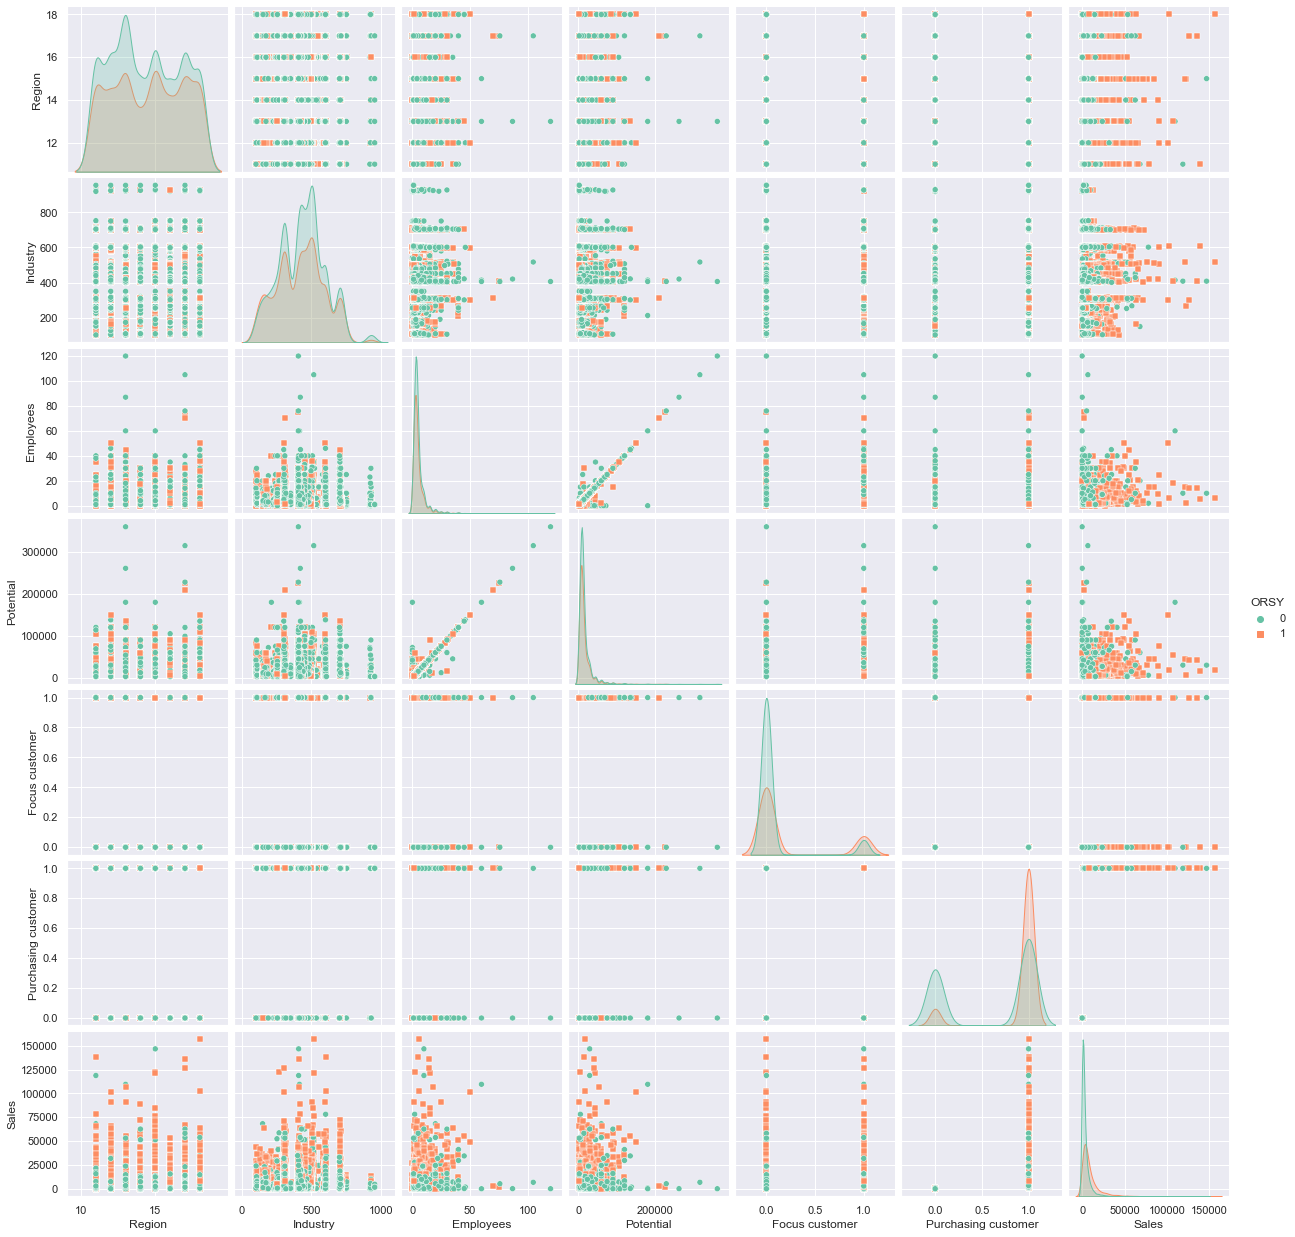

In [157]:
# sales & purchasing & focus customers looks like relevant features
sns.pairplot(df1, kind="scatter", hue="ORSY", markers=["o", "s"], palette="Set2")
plt.show()

In [158]:
df2 = df.iloc[:,9:14]
df2['Orders']= df['Orders']         
df2['Shop']=df['Shop']                                                                 
df2['App']=df['App']
df2['ORSY']=df['ORSY new customer']

df2.head()

,Sales,Sales Sales Rep,Sales Branch Office,Sales E-Business,Sales Internal Staff,Orders,Shop,App,ORSY
0,5391.0,2508.0,1198.0,952.0,733.0,25,1,0,1
1,4259.0,4126.0,15.0,118.0,0.0,22,1,0,1
2,1508.0,487.0,910.0,0.0,111.0,13,0,0,1
3,1557.0,1388.0,78.0,0.0,91.0,16,0,0,1
4,4066.0,3394.0,583.0,0.0,90.0,25,0,0,1


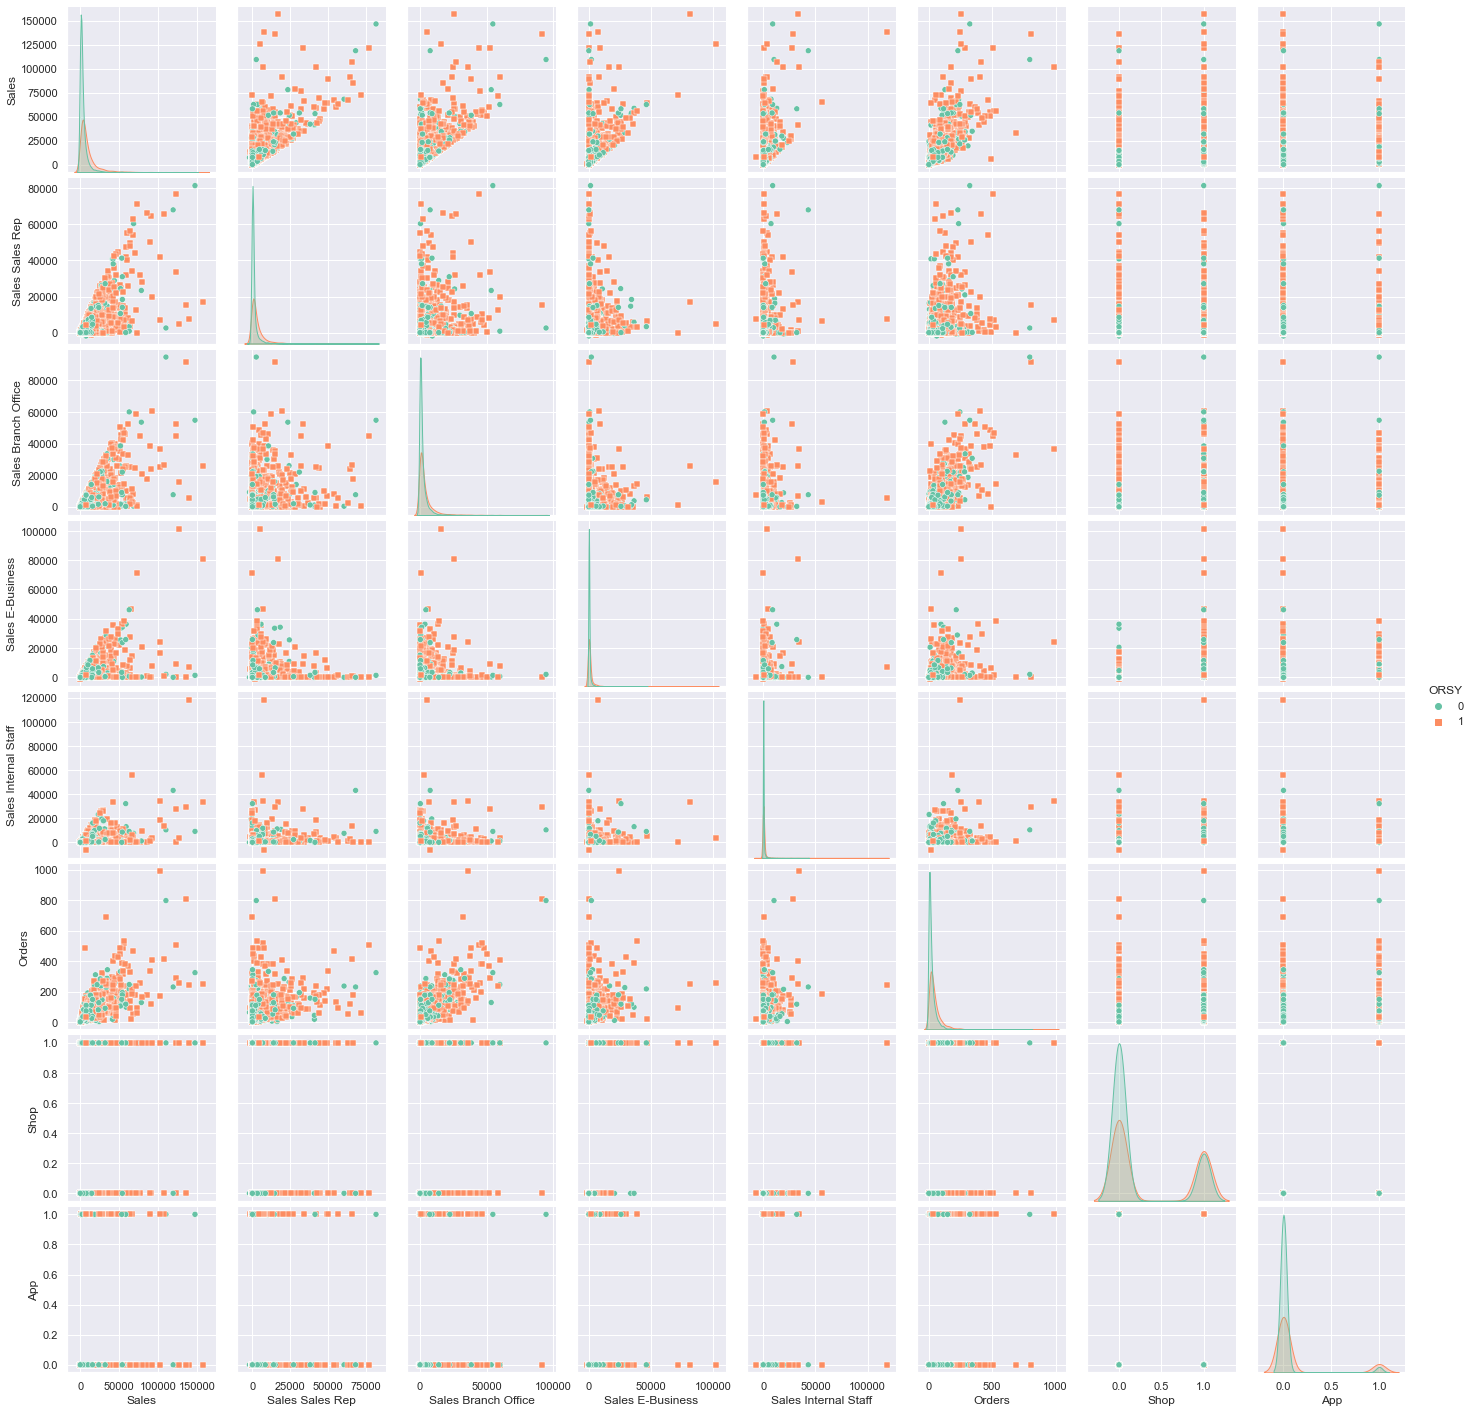

In [159]:
# having both app & shop increase the chance of becoming ORSY
sns.pairplot(df2, kind="scatter", hue="ORSY", markers=["o", "s"], palette="Set2")
plt.show()

In [160]:
df3 = df.iloc[:,16:24]
df3['ORSY']=df['ORSY new customer']
df3.head()

,Sales product area Personal Protective Equipment,Sales product area Traffic and construction site safety,Sales product area Building supplies,Sales product area Metal fittings,Sales product area Work equipment,"Sales product area Hoses, couplings, hose clamps",Sales product area ORSY system,Sales product area Fire protection,ORSY
0,1042.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1
1,371.0,0.0,0.0,0.0,227.0,91.0,0.0,0.0,1
2,126.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,1
3,463.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,1
4,62.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,1


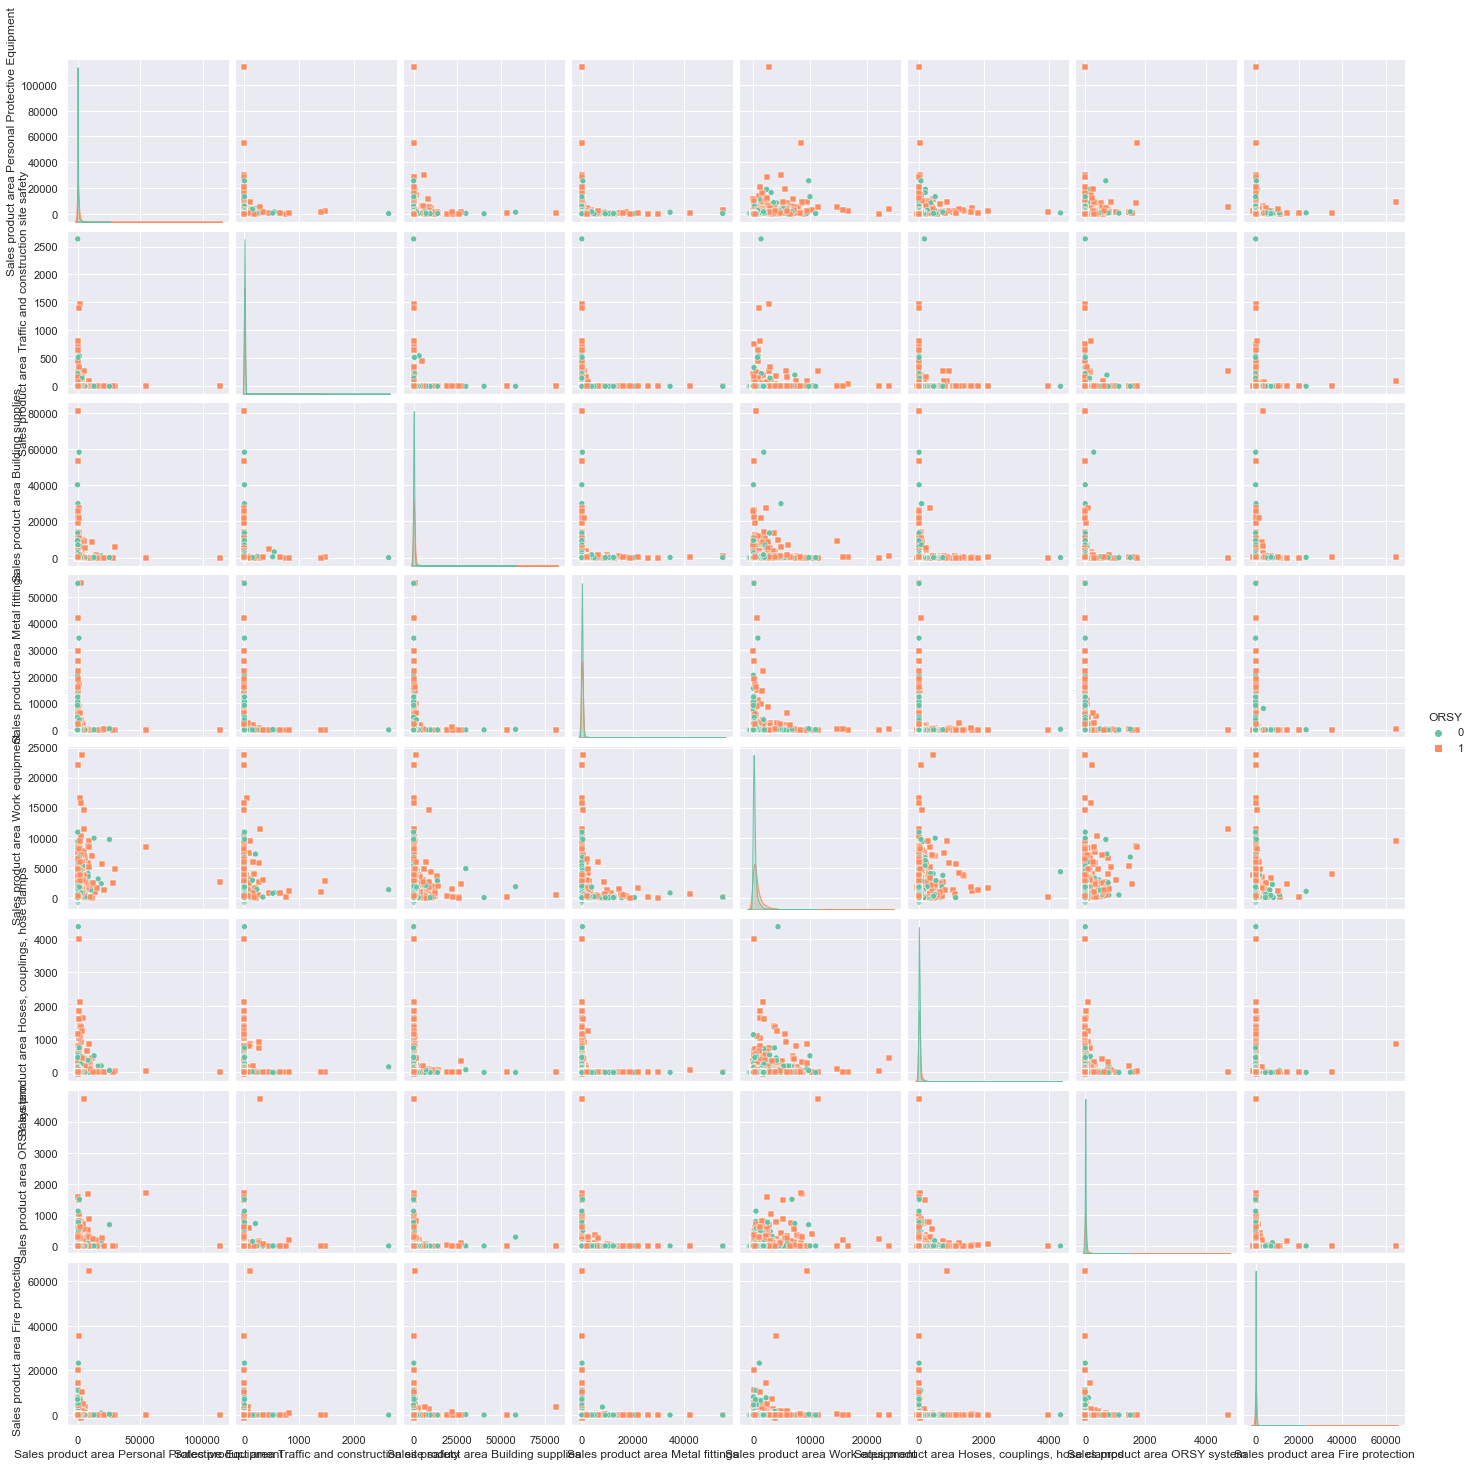

In [161]:
sns.pairplot(df3, kind="scatter", hue="ORSY", markers=["o", "s"], palette="Set2")
plt.show()

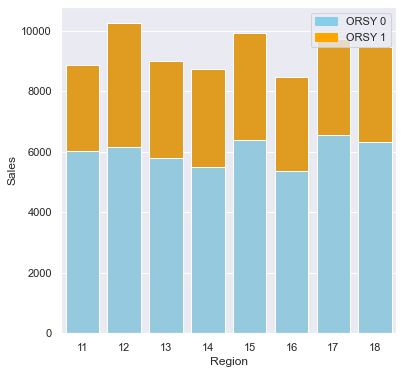

In [162]:
# ID of a customer is irrelevant to ORSY
# check region differences: ORSY customer has higher sales volume, yet regional difference is not significant
plt.figure(figsize=(6,6))

orsy_1= df[df['ORSY new customer']==1]
bar1 = sns.barplot(x='Region', y='Sales', data=orsy_1, ci=None, color= 'orange')

count_r = df.groupby("Region")['Sales'].mean().reset_index()
bar2 = sns.barplot(x='Region',y='Sales', data=count_r, color='skyblue')

top_bar = mpatches.Patch(color='skyblue', label='ORSY 0')
bottom_bar = mpatches.Patch(color='orange', label='ORSY 1')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

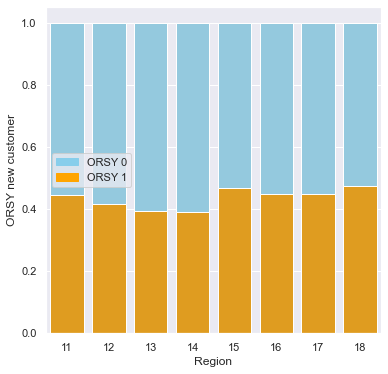

In [163]:
# in percentage the orsy customer doesn't vary too much across regions
plt.figure(figsize=(6,6))

bar1= sns.barplot(x='Region', y= 'ORSY new customer', data=df[df['ORSY new customer']==1], 
                  color= 'skyblue' )
bar2= sns.barplot(x='Region', y='ORSY new customer', data=df,ci=None, color= 'orange' )

top_bar = mpatches.Patch(color='skyblue', label='ORSY 0')
bottom_bar = mpatches.Patch(color='orange', label='ORSY 1')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

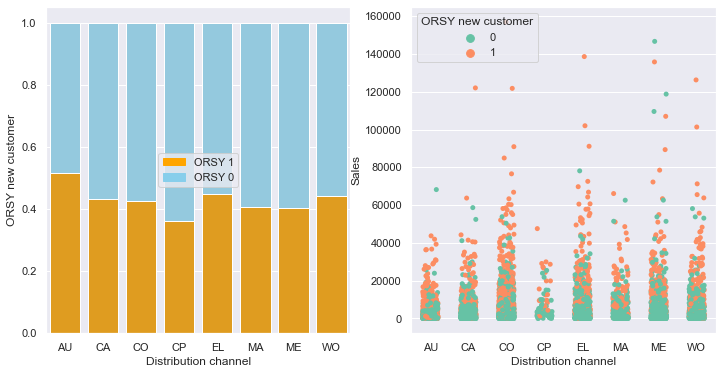

In [164]:
# distribution channel affecting ORSY
# significant difference in ORSY customers throughout different distributions aren't detected
# yet some region do have more large sales volume customers which doesn't stand out having more ORSY
plt.figure(figsize=(12,6))
plt.subplot(121)

bar1= sns.barplot(x='Distribution channel', y= 'ORSY new customer', data=df[df['ORSY new customer']==1], 
                  color= 'skyblue')
bar2= sns.barplot(x='Distribution channel', y='ORSY new customer', data=df,ci=None, color= 'orange' )
#add legend
top_bar = mpatches.Patch(color='orange', label='ORSY 1')
bottom_bar = mpatches.Patch(color='skyblue', label='ORSY 0')
plt.legend(handles=[top_bar, bottom_bar])

# plotting average sales per region
plt.subplot(122)
sns.stripplot(x='Distribution channel', y='Sales',jitter=0.2,data=df,hue="ORSY new customer",palette="Set2")
               #linestyle='-')
plt.show()

In [244]:
# new feature as relevant orsy sales in correspondence to whole sales
df['Relevant sales in p']=df['ORSY relevant_sales']/df['Potential']

<AxesSubplot:xlabel='ORSY new customer', ylabel='Relevant sales in p'>

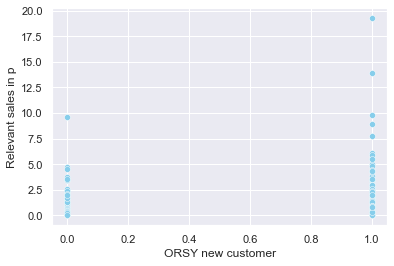

In [166]:
# new feature do indicate something, but not much
sns.set(style='darkgrid')
sns.scatterplot(x=df['ORSY new customer'],y=df['Relevant sales in p'],color="skyblue")

<AxesSubplot:xlabel='Industry', ylabel='Relevant sales in p'>

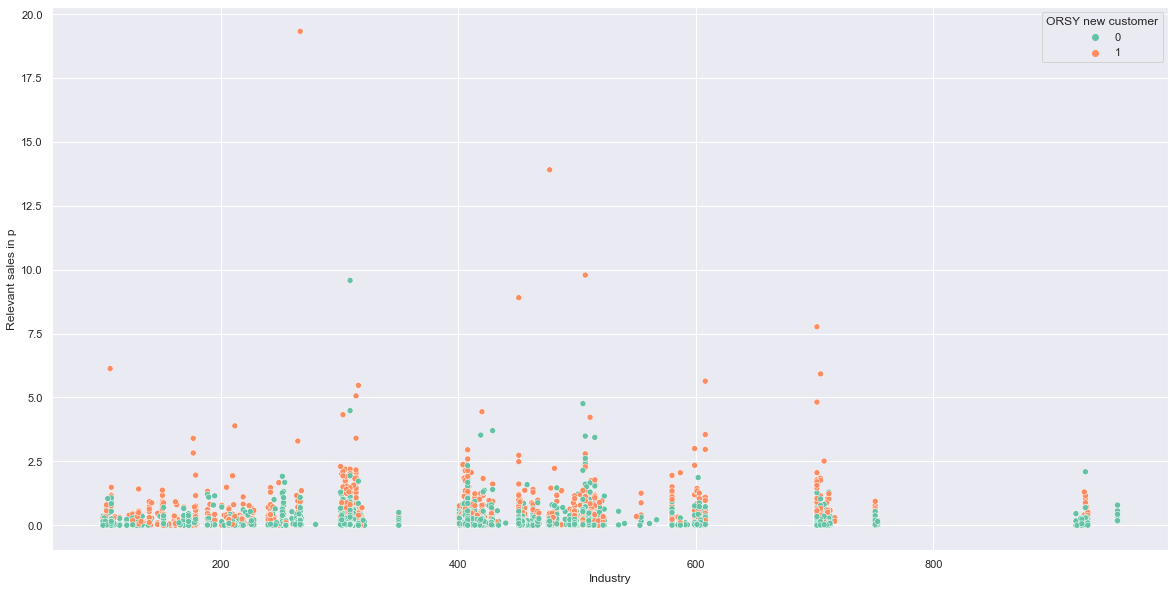

In [167]:
# industry influence are various, some industries have only non-orsy customers
plt.figure(figsize=(20,10))
sns.scatterplot(x='Industry',y='Relevant sales in p',data=df,hue='ORSY new customer',palette="Set2")

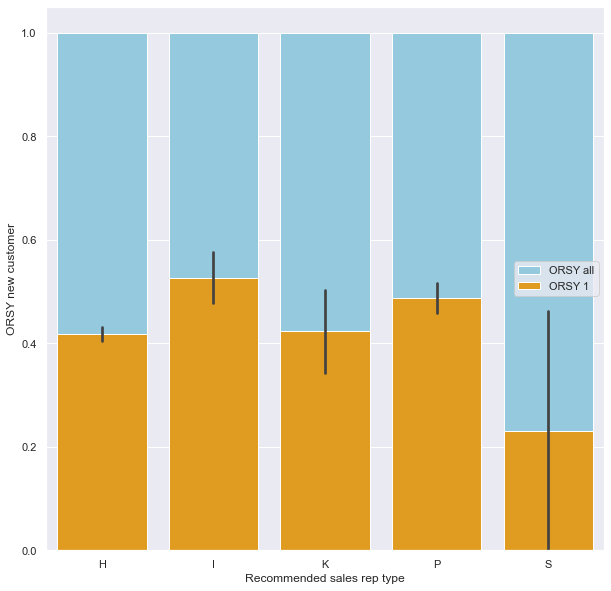

In [168]:
#Recommended sales rep type: S has the least ORSY customers proportionaly
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.barplot(data=df[df['ORSY new customer']==1], x="Recommended sales rep type", y='ORSY new customer',
             color="skyblue", label="ORSY all")
sns.barplot(data=df, x="Recommended sales rep type", y='ORSY new customer',
             color="orange", label="ORSY 1")
plt.legend()

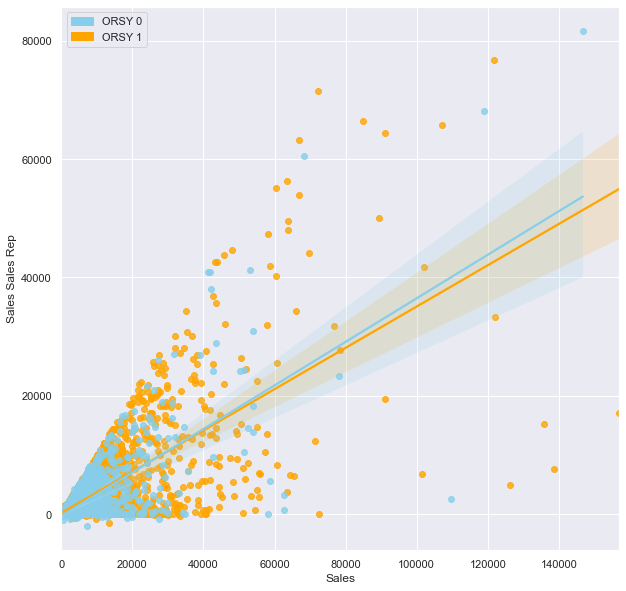

In [310]:
# sales, ORSY relevant sales
plt.figure(figsize=(10,10))
sns.regplot(x='Sales',y='Sales Sales Rep',data=df[df['ORSY new customer']==1],color='orange')
sns.regplot(x='Sales',y='Sales Sales Rep',data=df[df['ORSY new customer']==0],color='skyblue')

top_bar = mpatches.Patch(color='skyblue', label='ORSY 0')
bottom_bar = mpatches.Patch(color='orange', label='ORSY 1')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

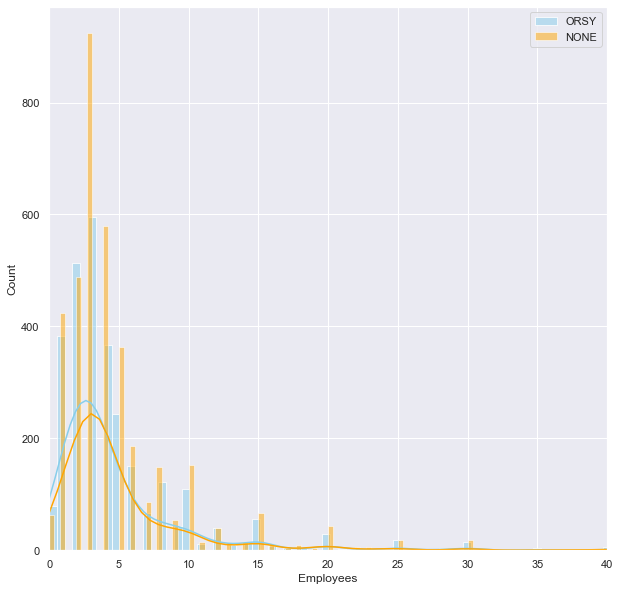

In [170]:
#Employees doesn't affect orsy along
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
plt.xlim(0, 40)
sns.histplot(data=df[df['ORSY new customer']==1], x="Employees", color="skyblue", label="ORSY", kde=True)
sns.histplot(data=df[df['ORSY new customer']==0], x="Employees", color="orange", label="NONE", kde=True)

plt.legend() 
plt.show()

In [245]:
#new feature exploration: sales per employee
df['Sales_per_employee']=np.where(df['Employees']!=0, df['Sales']/df['Employees'],df['Sales']/df['Employees'].mean())
df['P_sales_per_employee']=np.where(df['Employees']!=0, df['Potential']/df['Employees'],df['Potential'])

In [172]:
df.Employees.mean()

5.019613714627939

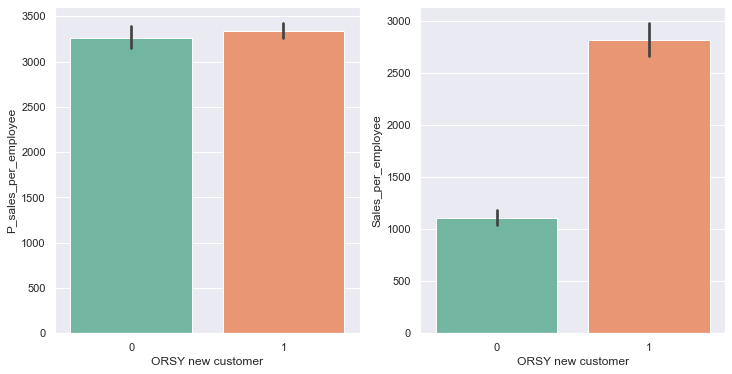

In [173]:
# sales per employee helps with distinguishment between whether ORSY or not better
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.barplot(y=df['P_sales_per_employee'],x=df['ORSY new customer'],data=df,palette="Set2")
plt.subplot(122)
sns.barplot(y=df['Sales_per_employee'],x=df['ORSY new customer'],data=df,palette="Set2")
plt.show()

Text(0.5, 0.98, 'ORSY Customers Generates More Sales')

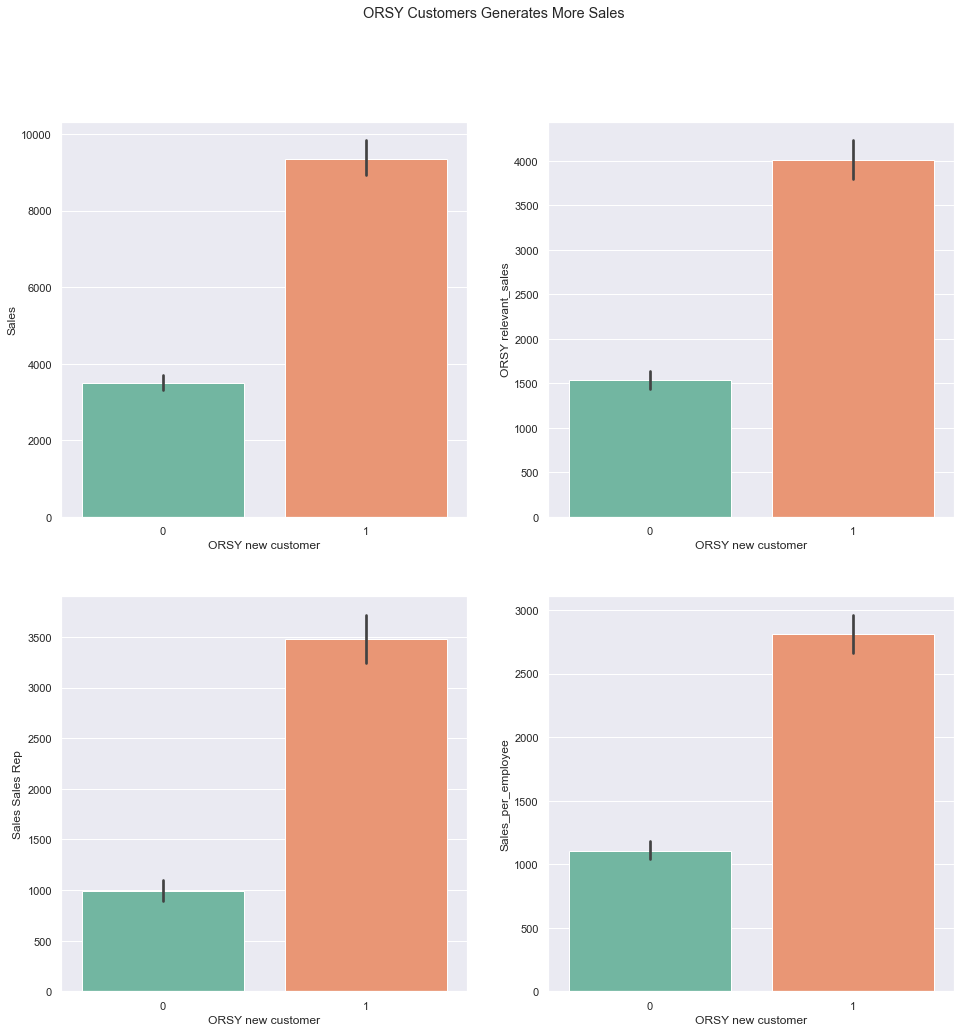

In [324]:
plt.figure(figsize=(16,16))
plt.subplot(221)
sns.barplot(y=df['Sales'],x=df['ORSY new customer'],data=df,palette="Set2")
plt.subplot(222)
sns.barplot(y=df['ORSY relevant_sales'],x=df['ORSY new customer'],data=df,palette="Set2")
plt.subplot(223)
sns.barplot(y=df['Sales Sales Rep'],x=df['ORSY new customer'],data=df,palette="Set2")
plt.subplot(224)
sns.barplot(y=df['Sales_per_employee'],x=df['ORSY new customer'],data=df,palette="Set2")

plt.suptitle('ORSY Customers Generates More Sales')

<AxesSubplot:xlabel='Focus customer', ylabel='Sales Sales Rep'>

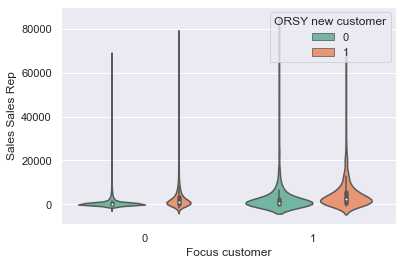

In [174]:
#focus customer
#purchasing customer
sns.violinplot(x='Focus customer',y='Sales Sales Rep',data=df,hue='ORSY new customer',palette="Set2")

In [246]:
# new feature: how many category has the sales crossed
df['Category']=df.iloc[:,16:46].apply(lambda s:s > 0).sum(axis=1)

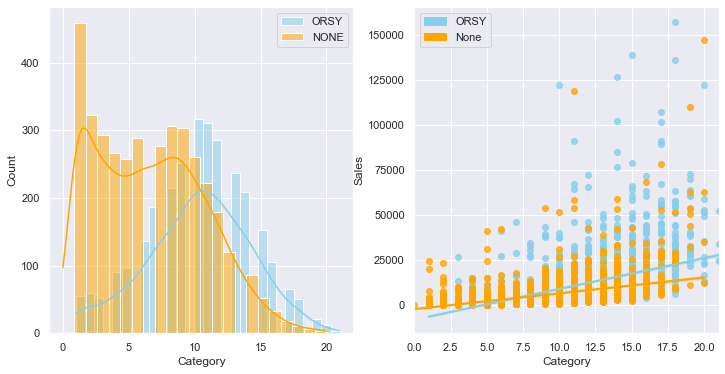

In [176]:
# crossing more categories leads to higher probability of being ORSY
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.set(style="darkgrid")
sns.histplot(data=df[df['ORSY new customer']==1], x='Category', color="skyblue", label="ORSY", kde=True)
sns.histplot(data=df[df['ORSY new customer']==0], x='Category', color="orange", label="NONE", kde=True)

plt.legend() 

plt.subplot(122)
sns.regplot(x='Category',y='Sales',data=df[df['ORSY new customer']==1],color='skyblue')
sns.regplot(x='Category',y='Sales',data=df[df['ORSY new customer']==0],color='orange')

top_bar = mpatches.Patch(color='skyblue', label='ORSY')
bottom_bar = mpatches.Patch(color='orange', label='None')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

(0.0, 7500.0)

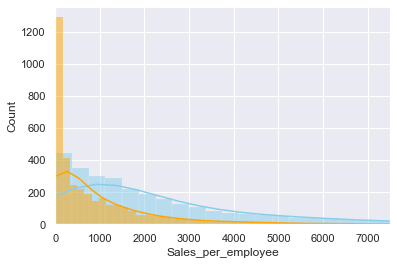

In [313]:
sns.set(style="darkgrid")
sns.histplot(data=df[df['ORSY new customer']==1], x='Sales_per_employee', color="skyblue", label="ORSY", kde=True)
sns.histplot(data=df[df['ORSY new customer']==0], x='Sales_per_employee', color="orange", label="NONE", kde=True)
plt.xlim([0,7500])

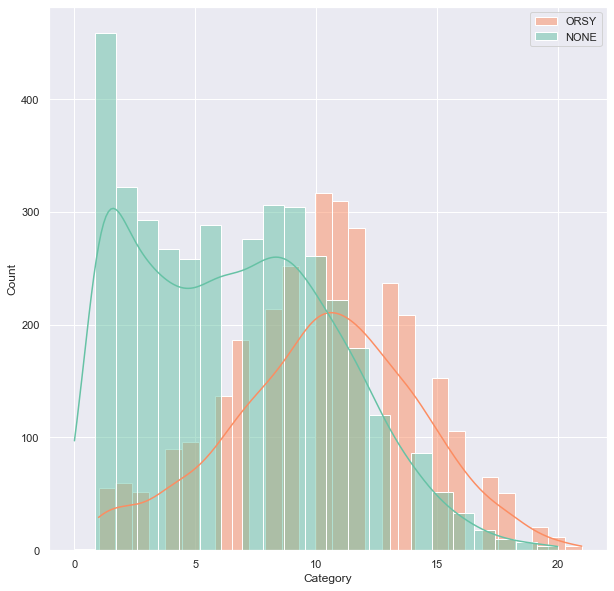

In [327]:
plt.figure(figsize = (10,10))
sns.set(style="darkgrid")
sns.histplot(data=df[df['ORSY new customer']==1], x='Category', color="#fc8d62", label="ORSY", kde=True)
sns.histplot(data=df[df['ORSY new customer']==0], x='Category', color="#66c2a5", label="NONE", kde=True)

plt.legend() 

In [247]:
df_m = df.drop(['ID','Industry','P_sales_per_employee','ORSY new customer'],axis=1)
df_m = pd.get_dummies(df_m, columns=['Region','Distribution channel','Recommended sales rep type'])

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [248]:
X = df_m
y = df['ORSY new customer']

X_train, X_test,y_train, y_test = train_test_split(X,y, random_state = 42)

In [192]:
# try dealing with imbalance - causing larger gap of accuracy: 1.0 to 0.7
#from collections import Counter
#from imblearn.under_sampling import RandomUnderSampler

#undersampler = RandomUnderSampler(sampling_strategy = 'majority')
#X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [181]:
#print('Resampled dataset shape %s' % Counter(y_train))

In [249]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15,max_features=10,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=10, n_estimators=300,
                       random_state=42)

In [250]:
print("Accuracy Train:{:.2f}".format(rfc.score(X_train,y_train)))
print("Accuracy Test:{:.2f}".format(rfc.score(X_test,y_test)))

Accuracy Train:0.99
Accuracy Test:0.73


In [251]:
#grid search and cross validation
rfc = RandomForestClassifier(random_state = 42)

param_r = {'n_estimators':[100,300,500],
          'max_depth':[10,25,50],
          'max_features':[5,15,25]}

clf1 = GridSearchCV(rfc,param_r, cv=5)
clf1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 25, 50], 'max_features': [5, 15, 25],
                         'n_estimators': [100, 300, 500]})

In [252]:
print("Best Parameter:{}".format(clf1.best_params_))
print("Accuracy Train (CV):{:.2f}".format(clf1.score(X_train,y_train)))
print("Accuracy Test (CV):{:.2f}".format(clf1.score(X_test,y_test)))

Best Parameter:{'max_depth': 10, 'max_features': 15, 'n_estimators': 500}
Accuracy Train (CV):0.89
Accuracy Test (CV):0.72


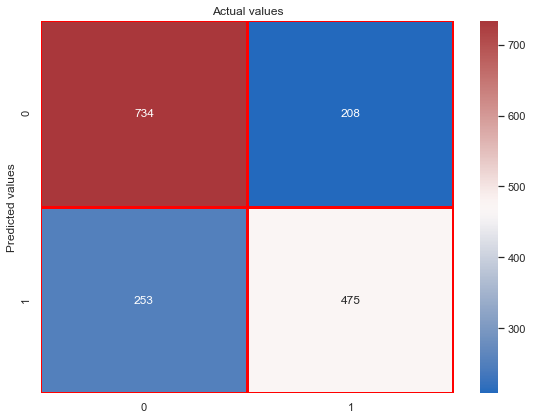

In [291]:
y_pred1 = clf1.predict(X_test)

plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred1),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf1.classes_,
    yticklabels = clf1.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

In [254]:
importance = pd.DataFrame(clf1.best_estimator_.feature_importances_,
             index=X_train.columns).sort_values(by=0,ascending=False)
importance.columns =['Value']
importance['Features']= importance.index

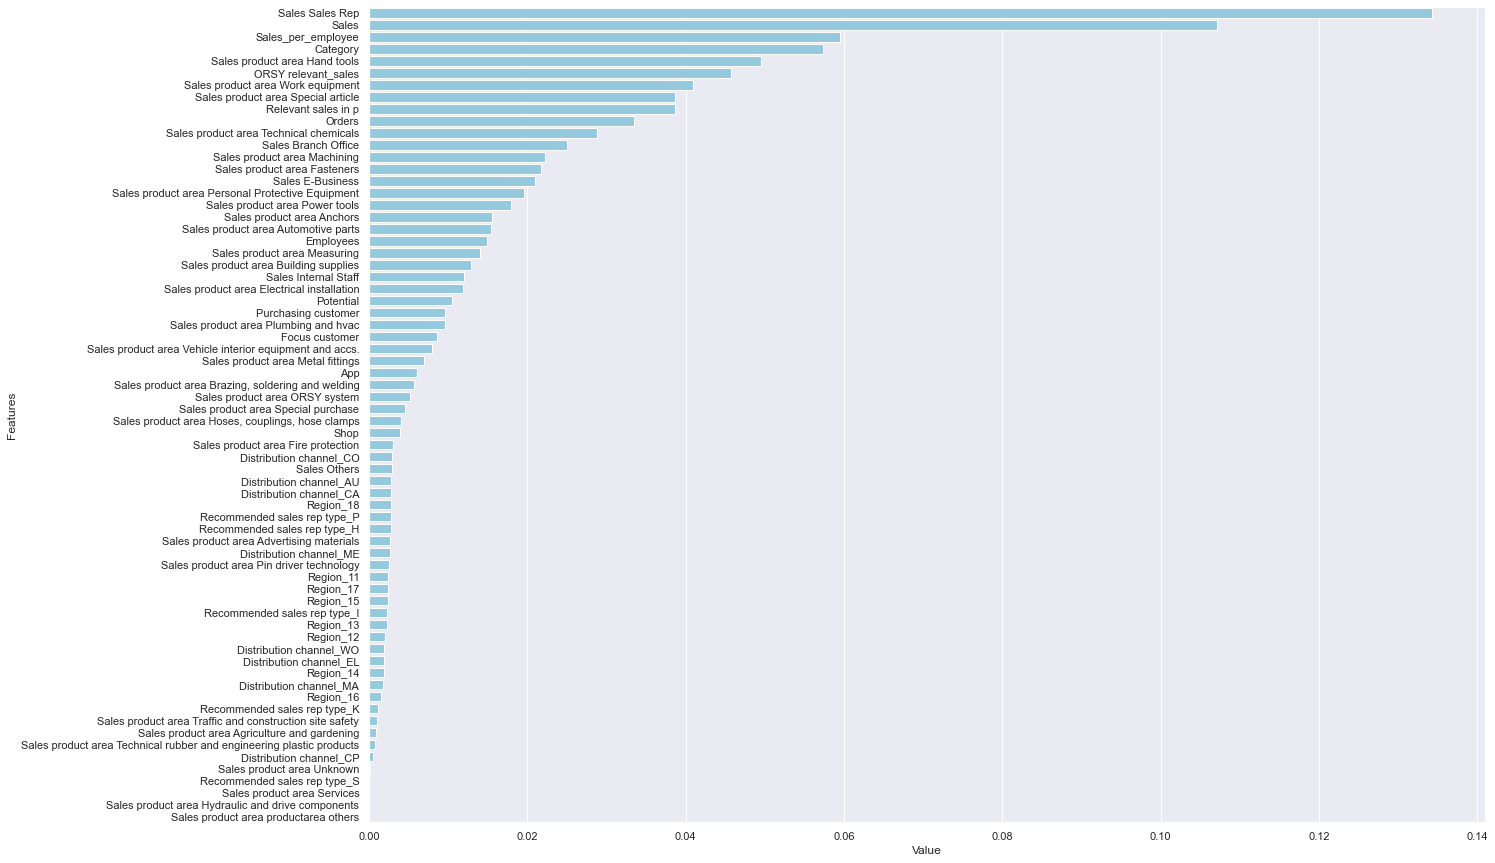

In [255]:
# distribution channel, region, recommended sales rep type belong to the least important features
plt.figure(figsize=(20,15))
sns.barplot(y='Features',x='Value',data=importance,color = 'skyblue')
plt.show()

In [256]:
#generate probability
rfc = RandomForestClassifier(max_depth=10, max_features=15, n_estimators=500)
rfc.fit(X_train,y_train)
rfc.predict_proba(df_m)

array([[0.19584232, 0.80415768],
       [0.25891665, 0.74108335],
       [0.53595721, 0.46404279],
       ...,
       [0.63420428, 0.36579572],
       [0.93536215, 0.06463785],
       [0.10849523, 0.89150477]])

In [257]:
prob = pd.DataFrame(rfc.predict_proba(df_m))
df['Prob']=prob.iloc[:,1]
df['Value']=df['Sales']*df['Prob']/(1 - df['Prob'])

In [202]:
sum(df.Value==0)

1

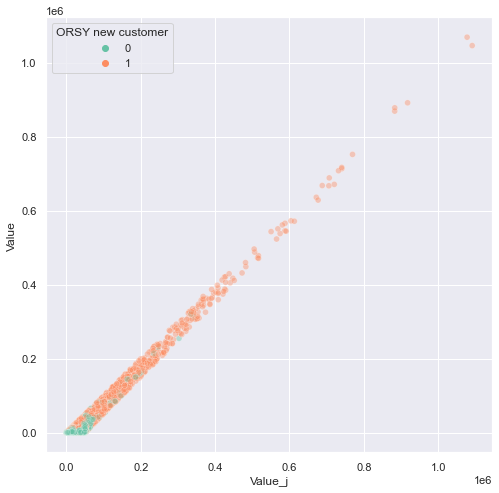

In [258]:
plt.figure(figsize = (8,8))
rank = df.loc[:,['Value','ORSY new customer']]
rank['Value_j'] = rank['Value']+np.random.randint(0,50000,len(rank['Value']))
sns.scatterplot(data=rank, x='Value_j',y='Value',hue='ORSY new customer', palette = 'Set2',alpha = 0.4)
plt.show()

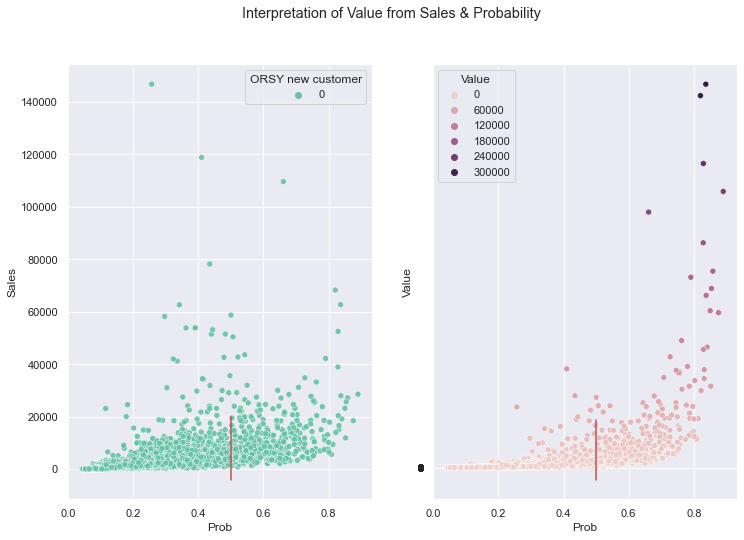

In [328]:
plt.figure(figsize = (12,8))

plt.subplot(122)
sns.scatterplot(data=df[df['ORSY new customer']==0], x='Prob',y='Value',hue='Value')
plt.plot([0.5,0.5],[-10000,40000],'k', color = 'r')
plt.yticks(y,label='')
plt.subplot(121)
sns.scatterplot(data=df[df['ORSY new customer']==0], x='Prob',y='Sales',hue='ORSY new customer', 
                palette = 'Set2',alpha = 0.9)
plt.plot([0.5,0.5],[-4000,20000],'k', color = 'r')

plt.suptitle("Interpretation of Value from Sales & Probability")
plt.show()

In [205]:
from sklearn.ensemble import GradientBoostingClassifier

gbf = GradientBoostingClassifier(random_state = 42)
gbf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [206]:
print("Accuracy Train:{:.2f}".format(gbf.score(X_train,y_train)))
print("Accuracy Test:{:.2f}".format(gbf.score(X_test,y_test)))

Accuracy Train:0.79
Accuracy Test:0.72


In [207]:
#grid search and cross validation
gbf = GradientBoostingClassifier(random_state = 42)

param_g = {'n_estimators':[100,300,500],
          'learning_rate':[0.1,0.5,1]}

clf2 = GridSearchCV(gbf,param_g, cv=5)
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [100, 300, 500]})

In [208]:
print("Best Parameter:{}".format(clf2.best_params_))
print("Accuracy Train (CV):{:.2f}".format(clf2.score(X_train,y_train)))
print("Accuracy Test (CV):{:.2f}".format(clf2.score(X_test,y_test)))

Best Parameter:{'learning_rate': 0.1, 'n_estimators': 100}
Accuracy Train (CV):0.79
Accuracy Test (CV):0.72


In [273]:
cols=importance[importance.Value > 0.02]['Features']

In [274]:
df_s = df_m[cols]

In [275]:
X_train_c, X_test_c,y_train_c, y_test_c = train_test_split(df_s,y, random_state = 42)

In [212]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(var_smoothing = 0.001)
nb.fit(X_train_c, y_train_c)

GaussianNB(var_smoothing=0.001)

In [213]:
print("Accuracy Train:{:.2f}".format(nb.score(X_train_c,y_train_c)))
print("Accuracy Test:{:.2f}".format(nb.score(X_test_c,y_test_c)))

Accuracy Train:0.64
Accuracy Test:0.62


In [214]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42,C=0.5,max_iter = 100)
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, random_state=42)

In [215]:
print("Accuracy Train:{:.2f}".format(lr.score(X_train,y_train)))
print("Accuracy Test:{:.2f}".format(lr.score(X_test,y_test)))

Accuracy Train:0.70
Accuracy Test:0.67


In [216]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = 3,alpha = 0.01,solver ='sgd')
mlp.fit(X_train,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=3, solver='sgd')

In [217]:
print("Accuracy Train:{:.2f}".format(mlp.score(X_train,y_train)))
print("Accuracy Test:{:.2f}".format(mlp.score(X_test,y_test)))

Accuracy Train:0.50
Accuracy Test:0.56


In [218]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [276]:
scaler = MinMaxScaler()
scaler.fit(df_s)
df_sc = scaler.transform(df_s)
df_sc

array([[5.28743620e-02, 3.43288334e-02, 5.92443624e-02, ...,
        4.48078344e-03, 3.63718098e-03, 2.00235457e-02],
       [7.22604299e-02, 2.71204789e-02, 1.17010638e-02, ...,
        1.76921656e-02, 1.18514886e-03, 1.19090476e-02],
       [2.86597493e-02, 9.60264901e-03, 5.52405234e-03, ...,
        1.15946046e-02, 3.69848178e-03, 1.07609531e-02],
       ...,
       [6.17406724e-02, 2.15868569e-02, 7.45087696e-03, ...,
        1.23337029e-02, 6.66748401e-02, 1.07609531e-02],
       [2.28247586e-02, 1.27356088e-04, 2.19789881e-05, ...,
        4.48078344e-03, 1.18514886e-03, 1.07609531e-02],
       [7.28714864e-02, 4.94268976e-02, 8.53004528e-02, ...,
        1.52900961e-02, 2.77692638e-02, 2.58905029e-02]])

In [264]:
kmeans_param = {"init":"random","n_init":10,"max_iter":300,"random_state":66}
sse = []
silhouette = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,**kmeans_param )
    kmeans.fit(df_sc)
    sse.append(kmeans.inertia_)
    score = silhouette_score(df_sc, kmeans.labels_)
    silhouette.append(score)

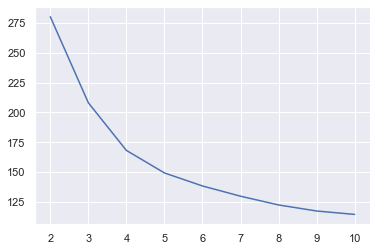

In [265]:
# elbow is not obvious,2&8 seemingly relative good
plt.plot(range(2,11),sse)

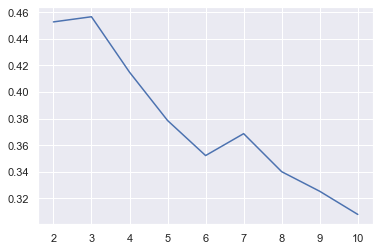

In [266]:
#silhouette measure
plt.plot(range(2,11),silhouette)

In [277]:
kmeans_f = KMeans(n_clusters=3,**kmeans_param )
kmeans_f.fit(df_sc)
kmeans_f.labels_

array([1, 1, 2, ..., 2, 2, 1], dtype=int32)

<AxesSubplot:xlabel='labels', ylabel='ORSY'>

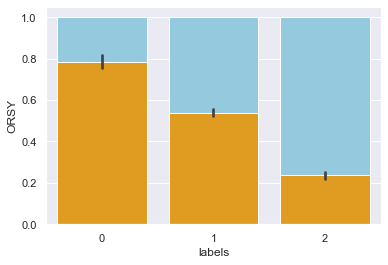

In [278]:
# check clustering result, non-clustering is optimal enough to reach over 80%
df_m['labels']=kmeans_f.labels_
df_m['ORSY']= df['ORSY new customer']

sns.barplot(x='labels',y='ORSY',data=df_m[df_m['ORSY']==1],color="skyblue", label="ORSY")
sns.barplot(x='labels',y='ORSY',data=df_m,color="orange", label="ORSY NO")

In [279]:
dbscan = DBSCAN(eps=0.4, min_samples= 100).fit(df_sc)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:xlabel='labels', ylabel='ORSY'>

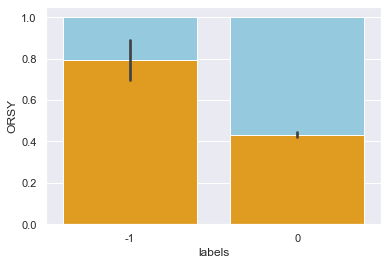

In [280]:
# for the first group, the model identified 83% as ORSY customer
df_m['labels']=dbscan.labels_
df_m['ORSY']= df['ORSY new customer']

sns.barplot(x='labels',y='ORSY',data=df_m[df_m['ORSY']==1],color="skyblue", label="ORSY")
sns.barplot(x='labels',y='ORSY',data=df_m,color="orange", label="ORSY NO")

<AxesSubplot:xlabel='Sales', ylabel='Sales Sales Rep'>

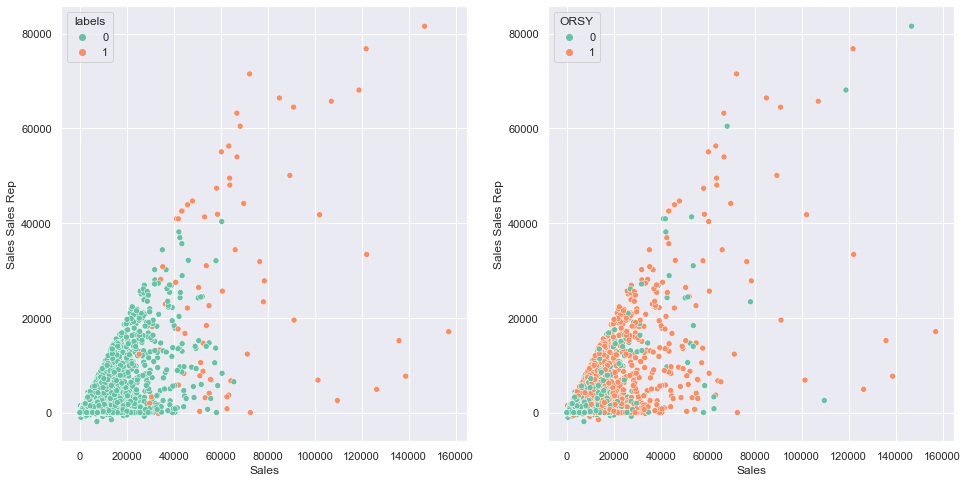

In [289]:
plt.figure(figsize = (16,8))
plt.subplot(121)
sns.scatterplot(x='Sales',y='Sales Sales Rep',data = df_m, hue = 'labels',palette= 'Set2')
plt.subplot(122)
sns.scatterplot(x='Sales',y='Sales Sales Rep',data = df_m, hue = 'ORSY',palette= 'Set2')

In [281]:
df_m['labels']=np.where(df_m['labels']==0,0,1)

In [282]:
sum(df_m['labels']==df_m['ORSY'])/len(df_m)

0.5702949543344812